<a href="https://colab.research.google.com/github/udaybhaskar717/Dphi/blob/main/Smart_Grid_Stability_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA

In [ ]:
from sklearn.preprocessing            import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors

from sklearn                 import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble        import RandomForestRegressor
from sklearn.datasets        import make_regression
from sklearn.model_selection import GridSearchCV
from sklearn                 import ensemble
from sklearn.metrics         import r2_score
from sklearn                 import tree
from google.colab            import files
from sklearn                 import tree
from sklearn.decomposition import KernelPCA
import matplotlib.colors

In [ ]:
data_train = pd.read_csv("/content/train_dataset (1).csv")
data_test = pd.read_csv("/content/test_dataset (1).csv")

In [ ]:
data_train

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab
0,5.813047,8.315720,7.902158,5.607994,3.882225,-1.219286,-1.718614,-0.944324,0.098318,0.776069,0.099405,0.297344,0.014721
1,1.004888,9.964462,3.507471,6.466059,3.661015,-0.955675,-1.829410,-0.875929,0.149197,0.730138,0.698466,0.196442,0.001280
2,5.736974,9.505319,5.749539,3.171354,3.103797,-0.611009,-0.633226,-1.859562,0.829826,0.821610,0.931990,0.651432,0.081829
3,4.766037,3.754471,4.486994,5.557779,2.349806,-1.005188,-0.524797,-0.819822,0.923570,0.304512,0.108366,0.453463,0.030169
4,4.114349,1.111495,0.535156,5.945791,4.765681,-0.983886,-1.927222,-1.854574,0.967572,0.510802,0.670605,0.511837,-0.015164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
47995,6.898493,0.892970,7.073462,0.829088,3.870392,-1.987879,-0.765324,-1.117190,0.444061,0.319689,0.811726,0.661333,-0.012710
47996,5.397788,7.204489,2.379857,5.400526,3.783470,-1.340151,-1.289212,-1.154106,0.981968,0.782510,0.854201,0.795580,0.090062
47997,8.770234,7.252446,1.252668,4.154315,3.767645,-1.781622,-0.548951,-1.437072,0.165098,0.153895,0.738758,0.833579,-0.043124
47998,4.686823,1.765640,2.308544,0.782001,3.997920,-0.859745,-1.890413,-1.247763,0.941998,0.194774,0.944924,0.688301,-0.000463


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

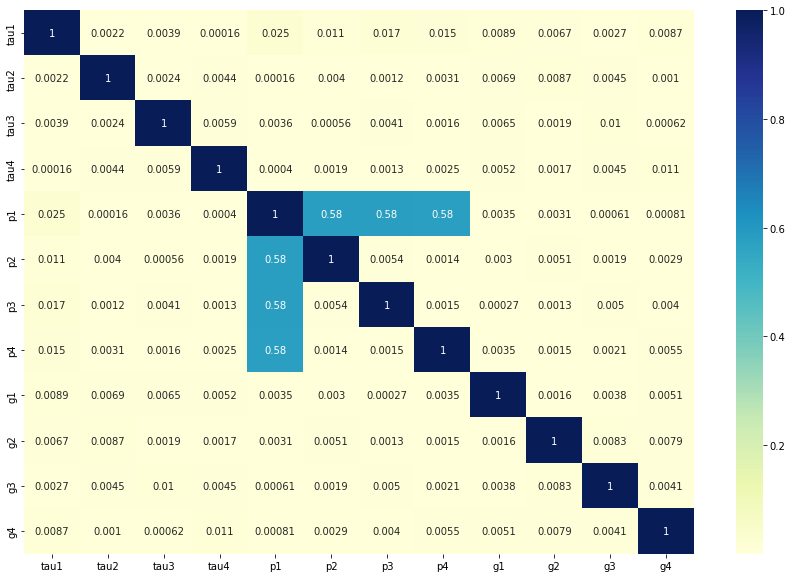

In [ ]:
fig = plt.gcf();
fig.set_size_inches(15, 10)
sns.heatmap(np.absolute(data_train.iloc[:,:-1].corr()), cmap="YlGnBu",annot=True)
plt.savefig("fig.png")
files.download('fig.png')

In [ ]:
y=data_train.stab

In [ ]:

def data_scaling( scaling_strategy , scaling_data , scaling_columns ):
    
    if    scaling_strategy =="RobustScaler" :
        scaling_data[scaling_columns] = RobustScaler().fit_transform(scaling_data[scaling_columns])
        
    elif  scaling_strategy =="StandardScaler" :
        scaling_data[scaling_columns] = StandardScaler().fit_transform(scaling_data[scaling_columns])
        
    elif  scaling_strategy =="MinMaxScaler" :
        scaling_data[scaling_columns] = MinMaxScaler().fit_transform(scaling_data[scaling_columns])
        
    elif  scaling_strategy =="MaxAbsScaler" :
        scaling_data[scaling_columns] = MaxAbsScaler().fit_transform(scaling_data[scaling_columns])
        
    else :  # If any other scaling send by mistake still perform Robust Scalar
        scaling_data[scaling_columns] = RobustScaler().fit_transform(scaling_data[scaling_columns])
    
    return scaling_data

In [ ]:
scaling_strategy = ["RobustScaler", "StandardScaler","MinMaxScaler","MaxAbsScaler"]
X_train_scale = data_scaling( scaling_strategy[1] , data_train.iloc[:,:-1],data_train.iloc[:,:-1].columns )


In [ ]:
X_test_scale  = data_scaling( scaling_strategy [1] , data_test , data_test.columns )

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train_scale,y,train_size=0.70,random_state=42,shuffle=True)

# GBA

In [ ]:
params = {
    "n_estimators":250,
    "max_depth":8,
    "min_samples_split":4,
    "learning_rate": 0.01,
    "loss": 'squared_error',
}
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=8, min_samples_split=4,
                          n_estimators=250)

In [ ]:
reg.score(X_train,y_train)

In [ ]:
reg.score(X_val,y_val)

In [ ]:
target=reg.predict(X_test_scale)

# Random Forest

In [ ]:
estimator = RandomForestRegressor(random_state=0)
param_grid = {'bootstrap': [False,True],
 'ccp_alpha': [0.0,0.035],
 'criterion': ['mse'],
 'max_depth': [10],
 'max_features':['auto'],
 'max_leaf_nodes': [None],
 'max_samples': [None],
 'min_impurity_decrease': [0.0],
 'min_samples_leaf': [1],
 'min_samples_split': [2],
 'min_weight_fraction_leaf':[0.0],
 'n_estimators': [200],
 'n_jobs': [None],
 'oob_score':[False],
 'random_state': [0],
 'verbose': [0],
 'warm_start': [False]}
grid = GridSearchCV(estimator, param_grid, n_jobs=-1,return_train_score=True)
grid.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


GridSearchCV(estimator=RandomForestRegressor(random_state=0), n_jobs=-1,
             param_grid={'bootstrap': [False, True], 'ccp_alpha': [0.0, 0.035],
                         'criterion': ['mse'], 'max_depth': [10],
                         'max_features': ['auto'], 'max_leaf_nodes': [None],
                         'max_samples': [None], 'min_impurity_decrease': [0.0],
                         'min_samples_leaf': [1], 'min_samples_split': [2],
                         'min_weight_fraction_leaf': [0.0],
                         'n_estimators': [200], 'n_jobs': [None],
                         'oob_score': [False], 'random_state': [0],
                         'verbose': [0], 'warm_start': [False]},
             return_train_score=True)

In [ ]:
grid.score(X_train,y_train)

0.924696466397106

In [ ]:
grid.score(X_val,y_val)

0.8905505839332033

In [ ]:
target=grid.predict(X_test_scale)

# KNN

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
grid_params = { 'n_neighbors' : [i for i in range(1,16)],
               'weights' : ['uniform','distance'],
               'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
               'metric' : ['euclidean','minkowski']}
gs = GridSearchCV(KNeighborsRegressor(), grid_params, verbose = 1,n_jobs = -1)
gs.fit(X_train,y_train)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


GridSearchCV(estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'metric': ['euclidean', 'minkowski'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [ ]:
print("\n Train score : ",gs.score(X_train,y_train),
"\n Validation score:",gs.score(X_val,y_val))


 Train score :  1.0 
 Validation score: 0.8579204410368123


In [ ]:
X_test_scale

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4
0,1.599058,0.459631,-0.896474,0.187774,0.915704,0.979952,-1.071025,-1.500265,-1.012336,0.511007,-0.912584,0.107186
1,-0.398679,1.155897,-1.225112,-1.513931,-0.090322,-0.606937,-0.489902,1.251802,-1.615387,0.502922,-1.307964,-1.551591
2,-1.728862,1.358923,-0.202153,1.044272,-1.166578,1.138940,1.059358,-0.170172,1.111440,-0.759404,0.636255,0.898224
3,0.729124,1.426691,0.958911,1.623994,-1.771720,1.658414,1.711785,-0.289781,0.814760,-1.207418,-1.489006,-1.164712
4,0.716118,0.395045,-0.252765,-0.940693,1.072692,0.225326,-0.349734,-1.737886,0.486013,-1.442649,0.146773,-0.412844
...,...,...,...,...,...,...,...,...,...,...,...,...
11995,-1.346156,1.367486,1.694811,0.746753,0.484547,1.339144,-1.389579,-0.793333,1.350506,-1.687254,0.587955,-0.120609
11996,0.561470,-1.306130,-1.432437,-0.295258,-0.879618,1.230672,1.615329,-1.314246,1.192220,1.649375,1.641946,-1.356789
11997,-0.699574,-0.601475,0.973219,0.774847,-1.394621,0.858109,0.391484,1.172223,1.112926,-1.320979,1.072781,-0.264730
11998,-0.504670,-0.248088,0.025678,-1.011278,-0.159397,0.588609,0.883785,-1.192935,1.575699,0.054123,1.329510,0.291833


In [ ]:
target=gs.predict(X_test_scale)

# DNN

In [ ]:
from keras import backend as K

def coeff_determination(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred )) 
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) ) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras import layers
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from tensorflow import keras
mc = ModelCheckpoint('best_model.h5', monitor='val_root_mean_squared_error', mode='min', verbose=1, save_best_only=True)
model = keras.Sequential([
    layers.Dense(24, kernel_initializer = 'normal',activation='relu', input_shape=[12]),
    layers.Dense(24,kernel_initializer = 'normal', activation='relu'),
    layers.Dense(12,kernel_initializer = 'normal', activation='relu'),
    layers.Dense(12,kernel_initializer = 'normal', activation='relu'),
    layers.Dense(4, kernel_initializer = 'normal',activation='relu'),
    layers.Dense(1)
])

In [ ]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [ ]:
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth=True
sess = tf.compat.v1.Session(config=config)

In [ ]:
def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true))) 


In [ ]:
from gc import callbacks
optimizer = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss=root_mean_squared_error , optimizer=optimizer,metrics=[tf.keras.metrics.RootMeanSquaredError()])
with tf.device('/gpu:0'):
    history = model.fit(X_train, y_train,validation_data=(X_val,y_val),batch_size=64,epochs=100,verbose=1,callbacks=[mc])

In [ ]:
target=saved_model.predict(X_test_scale)

# Submission

In [ ]:
#target = pd.read_csv(r'target.csv')
res = pd.DataFrame(target) #target is nothing but the final predictions of your model on input features of your new unseen test data
res.columns = ["stab"]
res.to_csv("submission.csv", index = False) # the csv file will be saved locally on the same location where this notebook is located.